In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/epl-prediction-2017-master')
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline
import pandas.util.testing as tm

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### Load the data

In [0]:
url = "http://www.football-data.co.uk/mmz4281/1920/E0.csv"
#url = "http://www.football-data.co.uk/mmz4281/0607/E0.csv"

In [0]:
testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/epl-prediction-2017-master/Data/England_copy/test/E0_19.csv")
#df.to_csv("/content/gdrive/My Drive/Colab Notebooks/epl-prediction-2017-master/Data/England_copy/test/E0_06.csv")

In [0]:
from glob import glob

#Function to concat all the csv files into one file
def concat(outfile = 'concat-season1119.csv'): #outfile = "name of the output file"
    filenames = glob('/content/gdrive/My Drive/Colab Notebooks/epl-prediction-2017-master/Data/England_copy/test/E0*.csv') #many filenames have similar pattern 
    dataframes = []
    for files in filenames:
        dataframes.append(pd.read_csv(files))
    concatDF = pd.concat(dataframes, axis=0) #axis=0 to concat vertically 
    concatDF.to_csv('/content/gdrive/My Drive/Colab Notebooks/epl-prediction-2017-master/Data/England_copy/test/'+ outfile, index = None) #index=None for no indexing
    
concat() #concat function call
    
#data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/epl-prediction-2017-master/Data/England_copy/test/concat-season1719.csv')
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/epl-prediction-2017-master/Data/England_copy/test/concat-season1119.csv')
display(df.head())

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Unnamed: 0
0,E0,17/08/13,Arsenal,Aston Villa,1,3,A,1,1,D,A Taylor,16,9,4,4,15,18,4,3,4,5,1,0,1.44,4.75,8.0,1.36,5.00,7.75,1.37,4.6,7.5,1.40,4.50,7.5,1.41,5.20,8.30,1.36,4.8,8.50,1.40,4.5,7.5,1.44,4.8,7.50,33,1.44,1.40,5.20,4.68,9.70,7.87,22,1.62,1.56,2.56,2.37,NaN,NaN,NaN,NaN,NaN,NaN,1.44,5.00,8.05,NaN
1,E0,17/08/13,Liverpool,Stoke,1,0,H,1,0,H,M Atkinson,26,10,11,4,11,11,12,6,1,1,0,0,1.40,5.00,9.5,1.40,4.33,8.25,1.40,4.4,7.3,1.44,4.20,7.5,1.41,4.88,9.35,1.36,4.6,9.00,1.36,4.5,9.5,1.40,5.0,9.50,32,1.44,1.38,4.95,4.54,10.00,8.88,30,1.86,1.79,2.12,2.02,NaN,NaN,NaN,NaN,NaN,NaN,1.42,4.62,10.19,NaN
2,E0,17/08/13,Norwich,Everton,2,2,D,0,0,D,M Oliver,8,19,2,6,13,10,6,8,2,0,0,0,3.20,3.40,2.4,3.10,3.25,2.30,2.90,3.3,2.3,3.00,3.30,2.3,3.32,3.41,2.35,3.10,3.3,2.30,3.00,3.4,2.3,3.12,3.4,2.40,33,3.35,3.12,3.41,3.27,2.40,2.31,31,2.08,1.98,1.91,1.82,NaN,NaN,NaN,NaN,NaN,NaN,3.81,3.27,2.21,NaN
3,E0,17/08/13,Sunderland,Fulham,0,1,A,0,0,D,N Swarbrick,20,5,3,1,14,14,6,1,0,3,0,0,2.30,3.40,3.4,2.25,3.20,3.25,2.20,3.2,3.2,2.20,3.25,3.3,2.25,3.37,3.58,2.20,3.3,3.30,2.25,3.3,3.3,2.30,3.4,3.30,33,2.30,2.22,3.45,3.30,3.58,3.29,31,2.14,2.04,1.84,1.77,NaN,NaN,NaN,NaN,NaN,NaN,2.52,3.23,3.16,NaN
4,E0,17/08/13,Swansea,Man United,1,4,A,0,2,A,P Dowd,17,15,6,7,13,10,7,4,1,3,0,0,4.20,3.50,2.0,4.10,3.50,1.87,4.20,3.5,1.8,4.00,3.50,1.9,4.10,3.52,2.03,4.00,3.4,1.91,4.00,3.6,1.9,3.80,3.6,2.05,33,4.33,3.84,3.60,3.40,2.10,1.99,31,1.93,1.83,2.06,1.98,NaN,NaN,NaN,NaN,NaN,NaN,3.62,3.41,2.22,NaN


In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/epl-prediction-2017-master/Data/England_copy/test/E0_19.csv")
#df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/epl-prediction-2017-master/Data/England_copy/test/E0_14.csv")


FileNotFoundError: ignored

In [0]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'Bb1X2',
       'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU',
       'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA',
       'Unnamed: 0'],
      dtype='object')

In [0]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Unnamed: 0
0,E0,17/08/13,Arsenal,Aston Villa,1,3,A,1,1,D,A Taylor,16,9,4,4,15,18,4,3,4,5,1,0,1.44,4.75,8.0,1.36,5.00,7.75,1.37,4.60,7.50,1.40,4.50,7.5,1.41,5.20,8.30,1.36,4.80,8.50,1.40,4.5,7.5,1.44,4.80,7.50,33,1.44,1.40,5.20,4.68,9.70,7.87,22,1.62,1.56,2.56,2.37,NaN,NaN,NaN,NaN,NaN,NaN,1.44,5.00,8.05,NaN
1,E0,17/08/13,Liverpool,Stoke,1,0,H,1,0,H,M Atkinson,26,10,11,4,11,11,12,6,1,1,0,0,1.40,5.00,9.5,1.40,4.33,8.25,1.40,4.40,7.30,1.44,4.20,7.5,1.41,4.88,9.35,1.36,4.60,9.00,1.36,4.5,9.5,1.40,5.00,9.50,32,1.44,1.38,4.95,4.54,10.00,8.88,30,1.86,1.79,2.12,2.02,NaN,NaN,NaN,NaN,NaN,NaN,1.42,4.62,10.19,NaN
2,E0,17/08/13,Norwich,Everton,2,2,D,0,0,D,M Oliver,8,19,2,6,13,10,6,8,2,0,0,0,3.20,3.40,2.4,3.10,3.25,2.30,2.90,3.30,2.30,3.00,3.30,2.3,3.32,3.41,2.35,3.10,3.30,2.30,3.00,3.4,2.3,3.12,3.40,2.40,33,3.35,3.12,3.41,3.27,2.40,2.31,31,2.08,1.98,1.91,1.82,NaN,NaN,NaN,NaN,NaN,NaN,3.81,3.27,2.21,NaN
3,E0,17/08/13,Sunderland,Fulham,0,1,A,0,0,D,N Swarbrick,20,5,3,1,14,14,6,1,0,3,0,0,2.30,3.40,3.4,2.25,3.20,3.25,2.20,3.20,3.20,2.20,3.25,3.3,2.25,3.37,3.58,2.20,3.30,3.30,2.25,3.3,3.3,2.30,3.40,3.30,33,2.30,2.22,3.45,3.30,3.58,3.29,31,2.14,2.04,1.84,1.77,NaN,NaN,NaN,NaN,NaN,NaN,2.52,3.23,3.16,NaN
4,E0,17/08/13,Swansea,Man United,1,4,A,0,2,A,P Dowd,17,15,6,7,13,10,7,4,1,3,0,0,4.20,3.50,2.0,4.10,3.50,1.87,4.20,3.50,1.80,4.00,3.50,1.9,4.10,3.52,2.03,4.00,3.40,1.91,4.00,3.6,1.9,3.80,3.60,2.05,33,4.33,3.84,3.60,3.40,2.10,1.99,31,1.93,1.83,2.06,1.98,NaN,NaN,NaN,NaN,NaN,NaN,3.62,3.41,2.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0,1.30,6.00,11.0,1.30,5.75,9.50,1.31,5.40,9.30,NaN,NaN,NaN,1.31,5.77,10.54,1.29,5.50,11.00,NaN,NaN,NaN,1.30,5.75,11.50,35,1.33,1.30,6.00,5.62,11.50,10.17,33,1.65,1.61,2.43,2.31,22.0,-1.5,1.98,1.91,2.01,1.95,1.32,5.89,9.48,375.0
2276,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0,1.28,6.50,11.0,1.25,6.25,11.00,1.28,6.10,9.20,NaN,NaN,NaN,1.28,6.33,10.21,1.25,6.50,10.00,NaN,NaN,NaN,1.29,6.25,11.00,34,1.31,1.28,6.75,6.18,11.00,10.10,32,1.45,1.39,3.25,2.95,21.0,-2.0,2.52,2.32,1.72,1.64,1.30,6.06,9.71,376.0
2277,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0,1.44,4.75,8.5,1.42,4.75,7.25,1.42,4.80,7.10,NaN,NaN,NaN,1.44,4.83,7.62,1.40,4.75,8.00,NaN,NaN,NaN,1.40,4.80,8.50,34,1.45,1.42,5.15,4.81,8.75,7.64,32,1.67,1.62,2.40,2.29,22.0,-1.5,2.27,2.16,1.80,1.73,1.37,5.36,8.49,377.0
2278,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0,2.20,3.50,3.5,2.10,3.50,3.50,2.05,3.45,3.60,NaN,NaN,NaN,2.10,3.64,3.64,2.10,3.50,3.50,NaN,NaN,NaN,2.10,3.50,3.70,35,2.20,2.09,3.70,3.51,3.80,3.58,34,1.81,1.76,2.18,2.07,19.0,-0.5,2.13,2.08,1.85,1.80,1.91,3.81,4.15,378.0


### Cleaning and subsetting required data

Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [0]:
#res_16 = df.ix[:,:23] 배팅 데이터 자르기
res_16 = df.iloc[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
#table_features = df.ix[:,:7]
table_features = df.iloc[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
#bet_16 = df.ix[:,23:]
bet_16 = df.iloc[:,23:]

In [0]:
res_16.head()
#feature_table = df.ix[:,:23]
feature_table = df.iloc[:,:23]

In [0]:
res_16.tail()
#res_16.shape[0]

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
2275,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0
2276,Man United,Cardiff,0,2,A,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0
2277,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0
2278,Tottenham,Everton,2,2,D,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0
2279,Watford,West Ham,1,4,A,0,2,A,C Kavanagh,17,16,8,9,10,10,7,2,1,0,1,0


In [0]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))
#table_16 = table_16[:-10]
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS


In [0]:
res_16 = res_16[:-10]
res_16.shape[0]

2270

In [0]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.5405286343612334
Average number of goals away 1.1779735682819383
Average number of goals conceded at home 1.1779735682819383
Average number of goals conceded away 1.5405286343612334


In [0]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [0]:
#list(res_home)
res_home.HomeTeam.all().index

Index(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
       'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Huddersfield', 'Hull', 'Leicester', 'Liverpool', 'Man City',
       'Man United', 'Middlesbrough', 'Newcastle', 'Norwich', 'QPR',
       'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford',
       'West Brom', 'West Ham', 'Wolves'],
      dtype='object', name='HomeTeam')

In [0]:
table_16.Team = res_home.HomeTeam.all().index
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values

In [0]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20
res_16.shape[0]

2270

In [0]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,243,182,1.389763,1.361257,88,170,0.658190,0.972262
1,Aston Villa,54,43,0.308836,0.321616,89,105,0.665669,0.600515
2,Bournemouth,114,84,0.651987,0.628272,118,142,0.882573,0.812125
3,Brighton,42,26,0.240206,0.194465,49,61,0.366492,0.348870
4,Burnley,79,68,0.451816,0.508601,87,125,0.650711,0.714898
5,Cardiff,41,23,0.234487,0.172027,73,70,0.545999,0.400343
6,Chelsea,235,178,1.344009,1.331339,95,127,0.710546,0.726337
7,Crystal Palace,125,135,0.714898,1.009723,145,173,1.084518,0.989420
8,Everton,200,126,1.143838,0.942408,129,161,0.964847,0.920789
9,Fulham,46,28,0.263083,0.209424,70,92,0.523560,0.526165


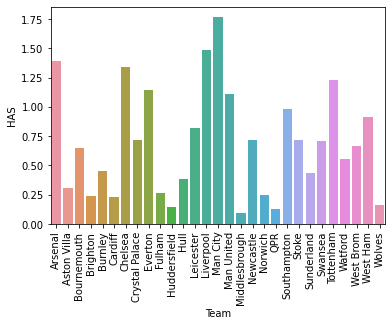

In [0]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [0]:
table_16[table_16.Team == "Leicester"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
12,Leicester,143,126,0.817844,0.942408,107,155,0.800299,0.886474


In [0]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []

for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [0]:
feature_table.head(280)
#table_16

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Arsenal,Aston Villa,A,4,4,1.389763,0.658190,0.321616,0.600515
1,Liverpool,Stoke,H,11,4,1.481270,0.732984,0.635752,0.909351
2,Norwich,Everton,D,2,6,0.245925,0.359013,0.942408,0.920789
3,Sunderland,Fulham,A,3,1,0.434658,0.807779,0.209424,0.526165
4,Swansea,Man United,A,6,7,0.709179,0.942408,1.256545,0.772090
...,...,...,...,...,...,...,...,...,...
275,Tottenham,Cardiff,H,6,2,1.229625,0.755423,0.172027,0.400343
276,Cardiff,Fulham,H,9,6,0.234487,0.545999,0.209424,0.526165
277,Chelsea,Tottenham,H,4,2,1.344009,0.710546,1.436051,0.783529
278,Crystal Palace,Southampton,A,1,3,0.714898,1.084518,0.882573,0.880755


In [0]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [0]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [0]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
2260,Everton,Burnley,H,6,1,1.143838,0.964847,0.508601,0.714898,1
2261,Bournemouth,Tottenham,H,6,5,0.651987,0.882573,1.436051,0.783529,1
2262,Cardiff,Crystal Palace,A,8,7,0.234487,0.545999,1.009723,0.989420,-1
2263,Newcastle,Liverpool,A,7,4,0.720618,0.905011,1.540763,0.869317,-1
2264,West Ham,Southampton,H,6,1,0.909351,1.151832,0.882573,0.880755,1
2265,Wolves,Fulham,H,6,2,0.160137,0.157068,0.209424,0.526165,1
2266,Arsenal,Brighton,D,8,5,1.389763,0.658190,0.194465,0.348870,0
2267,Chelsea,Watford,H,9,3,1.344009,0.710546,0.583396,0.766371,1
2268,Huddersfield,Man United,D,3,7,0.148699,0.418848,1.256545,0.772090,0
2269,Man City,Leicester,H,5,2,1.767229,0.680628,0.942408,0.886474,1


In [0]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [0]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()

In [0]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf4, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


KeyboardInterrupt: ignored

In [0]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

# skt = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# scores = cross_val_score(clf1, X_train, y_train, cv=skt)
# print(scores)
# print(scores.mean())

# kfold = KFold(n_splits=10, shuffle=True, random_state=0)
# scores = cross_val_score(clf1, X_train, y_train, cv=kfold)
# print(scores)
# print(scores.mean())

TypeError: ignored

In [0]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

# skt = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# scores = cross_val_score(clf2, X_train, y_train, cv=skt)
# print(scores)
# print(scores.mean())

# kfold = KFold(n_splits=10, shuffle=True, random_state=0)
# scores = cross_val_score(clf2, X_train, y_train, cv=kfold)
# print(scores)
# print(scores.mean())

[0.62114537 0.62114537 0.5814978  0.6123348  0.59030837 0.64317181
 0.59471366 0.54185022 0.58590308 0.6123348 ]
0.6004405286343613


In [0]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

# skt = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# scores = cross_val_score(clf3, X_train, y_train, cv=skt)
# print(scores)
# print(scores.mean())

# kfold = KFold(n_splits=10, shuffle=True, random_state=0)
# scores = cross_val_score(clf3, X_train, y_train, cv=kfold)
# print(scores)
# print(scores.mean())

[0.59911894 0.60352423 0.5814978  0.58590308 0.59471366 0.59030837
 0.5814978  0.57268722 0.60352423 0.60352423]
0.5916299559471365


## Adding Recent Performance

In [0]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [0]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [0]:
# Adding next week fixtures
# new_fixtures = pd.DataFrame( [['Leicester','Man United','D',0,0,0,0,0,0],
#                              ['Burnley','Tottenham','D',0,0,0,0,0,0],
#                              ['Swansea','Crystal Palace','D',0,0,0,0,0,0],
#                              ['West Ham','Newcastle','D',0,0,0,0,0,0],
#                              ['Stoke','West Brom','D',0,0,0,0,0,0],
#                              ['Southampton','Huddersfield','D',0,0,0,0,0,0],
#                              ['Man City','Bournemouth','D',0,0,0,0,0,0],
#                              ['Brighton','Watford','D',0,0,0,0,0,0],
#                              ['Everton','Chelsea','D',0,0,0,0,0,0],
#                              ['Arsenal','Liverpool','D',0,0,0,0,0,0]],columns=feat_table.columns)
# new_fixtures = pd.DataFrame( [['Aston Villa','Chelsea','D',0,0,0,0,0,0],
#                               ['Bournemouth','Crystal Palace','D',0,0,0,0,0,0],
#                               ['Brighton','Arsenal','D',0,0,0,0,0,0],
#                               ['Everton','Liverpool','D',0,0,0,0,0,0],
#                               ['Man City','Burnley','D',0,0,0,0,0,0],
#                               ['Newcastle','Sheffield United','D',0,0,0,0,0,0],
#                               ['Norwich','Southampton','D',0,0,0,0,0,0],
#                               ['Tottenham','Man United','D',0,0,0,0,0,0],
#                               ['Watford','Leicester','D',0,0,0,0,0,0],
#                               ['West Ham','Wolves','D',0,0,0,0,0,0]],columns=feat_table.columns)

# new_fixtures = pd.DataFrame( [['Liverpool','Bournemouth','D',0,0,0,0,0,0],
#                               ['Arsenal','West Ham','D',0,0,0,0,0,0],
#                               ['Crystal Palace','Watford','D',0,0,0,0,0,0],
#                               ['Sheffield United','Norwich','D',0,0,0,0,0,0],
#                               ['Southampton','Newcastle','D',0,0,0,0,0,0],
#                               ['Wolves','Brighton','D',0,0,0,0,0,0],
#                               ['Burnley','Tottenham','D',0,0,0,0,0,0],
#                               ['Chelsea','Everton','D',0,0,0,0,0,0],
#                               ['Man United','Man City','D',0,0,0,0,0,0],
#                               ['Leicester','Aston Villa','D',0,0,0,0,0,0]],columns=feat_table.columns)

new_fixtures = pd.DataFrame( [['Fulham','Chelsea','D',0,0,0,0,0,0],
                              ['Bournemouth','Crystal Palace','D',0,0,0,0,0,0],
                              ['Brighton','Arsenal','D',0,0,0,0,0,0],
                              ['Everton','Liverpool','D',0,0,0,0,0,0],
                              ['Man City','Burnley','D',0,0,0,0,0,0],
                              ['Newcastle','Cardiff','D',0,0,0,0,0,0],
                              ['Huddersfield','Southampton','D',0,0,0,0,0,0],
                              ['Tottenham','Man United','D',0,0,0,0,0,0],
                              ['Watford','Leicester','D',0,0,0,0,0,0],
                              ['West Ham','Wolves','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [0]:
feat_table.columns

Index(['HomeTeam', 'AwayTeam', 'FTR', 'FTHG', 'FTAG', 'HS', 'AS', 'HC', 'AC'], dtype='object')

In [0]:
feat_table

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC
2269,Man City,Leicester,H,1,0,19,7,11,0
2268,Huddersfield,Man United,D,1,1,7,23,3,7
2267,Chelsea,Watford,H,3,0,19,15,6,6
2266,Arsenal,Brighton,D,1,1,20,11,16,3
2265,Wolves,Fulham,H,1,0,19,6,7,1
...,...,...,...,...,...,...,...,...,...
4,Swansea,Man United,A,1,4,17,15,7,4
3,Sunderland,Fulham,A,0,1,20,5,6,1
2,Norwich,Everton,D,2,2,8,19,6,8
1,Liverpool,Stoke,H,1,0,26,10,12,6


In [0]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(2280, 9)

In [0]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [0]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
2279,Fulham,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2278,Bournemouth,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2277,Brighton,Arsenal,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2276,Everton,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2275,Man City,Burnley,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2274,Newcastle,Cardiff,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2273,Huddersfield,Southampton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2272,Tottenham,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2271,Watford,Leicester,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2270,West Ham,Wolves,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
pip install -U pandas-profiling

In [0]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [0]:
# Adding k recent performance metrics. Change value of k.
k = 3
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    #feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.at[i,'pastHC'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k
    #feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.at[i,'pastAC'] = (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k
    #feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.at[i,'pastHS'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k
    #feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.at[i,'pastAS'] = (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k
    #feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.at[i,'pastHG'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k
    #feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)
    feat_table.at[i,'pastAG'] =  (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for i,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [0]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [0]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [0]:
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(2280, 19)


2270

In [0]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [0]:
### Try predictions here too.

# Adding home advantage

In [0]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [0]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split
print(n_games)

2270
2255


In [0]:
test_table = test_table.fillna(0)

In [0]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Arsenal,Aston Villa,A,0.0,0.0,0.0,0.0,0.0,0.0,1.389763,0.658190,1.361257,0.972262,-1,0.0,0.0,0.0
1,Liverpool,Stoke,H,0.0,0.0,0.0,0.0,0.0,0.0,1.481270,0.732984,1.540763,0.869317,1,0.0,0.0,0.0
2,Norwich,Everton,D,0.0,0.0,0.0,0.0,0.0,0.0,0.245925,0.359013,0.179506,0.463254,0,0.0,0.0,0.0
3,Sunderland,Fulham,A,0.0,0.0,0.0,0.0,0.0,0.0,0.434658,0.807779,0.545999,0.777810,-1,0.0,0.0,0.0
4,Swansea,Man United,A,0.0,0.0,0.0,0.0,0.0,0.0,0.709179,0.942408,0.680628,0.886474,-1,0.0,0.0,0.0


In [0]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [0]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
2270,-0.666667,0.000000,3.333333,0.909351,1.151832,0.994764,1.035173
2271,-1.333333,-0.333333,3.666667,0.554761,0.770381,0.583396,0.766371
2272,0.888889,-0.111111,4.444444,1.229625,0.755423,1.436051,0.783529
2273,-0.555556,-0.222222,5.666667,0.148699,0.418848,0.172027,0.440377
2274,-1.333333,0.444444,3.666667,0.720618,0.905011,0.583396,0.920789
2275,-0.666667,0.222222,2.111111,1.767229,0.680628,1.675393,0.646268
2276,1.333333,-0.444444,1.111111,1.143838,0.964847,0.942408,0.920789
2277,0.000000,0.000000,6.222222,0.240206,0.366492,0.194465,0.348870
2278,-0.111111,-0.222222,4.888889,0.651987,0.882573,0.628272,0.812125
2279,-0.222222,-0.444444,4.555556,0.263083,0.523560,0.209424,0.526165


In [0]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [0]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


# #Linear SVC
# plot_scores_SVC = []
# for b in range(1,50):
#     clf_svc = LinearSVC(C=1)
#     clf_svc.fit(X_train,y_train)
#     scores = accuracy_score(y_test,clf_svc.predict(X_test))
#     plot_scores_SVC.append(scores)


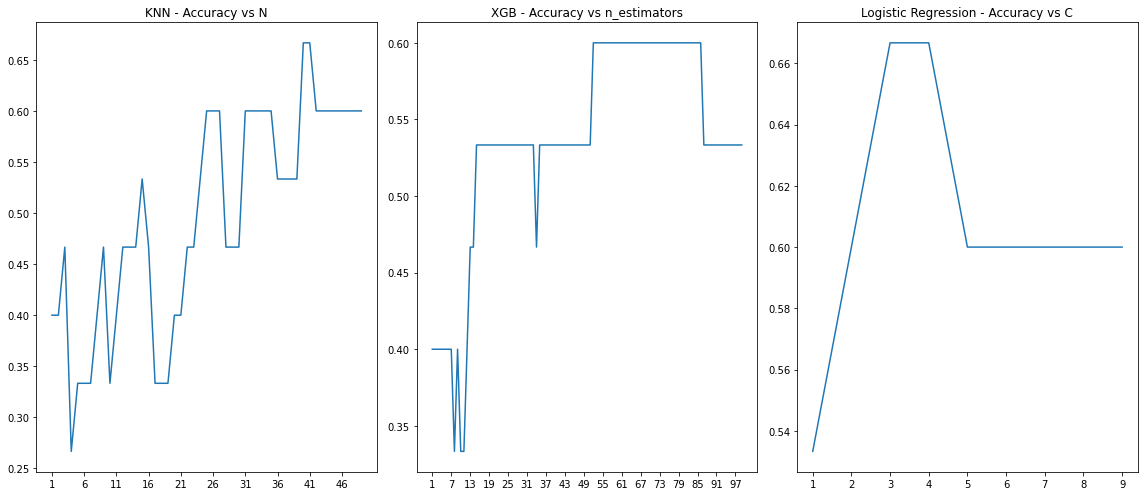

In [0]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")


fig.tight_layout()

In [0]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

# max_SVC = max(plot_scores_SVC)
# max_SVC_ind = plot_scores_SVC.index(max_SVC)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)
#print(max_SVC, max_SVC_ind)

#max_knn_ind=15 
#max_XGB_ind=40
#max_logreg_ind=7



0.6666666666666666 39
0.6 51
0.6666666666666666 2


In [0]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [0]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [0]:
predictedProbability=clf_knn.predict_proba(X_predict)
predictedProbability = pd.DataFrame(predictedProbability, columns=['Away Team','Draw','Home Team'])
predictedProbability2=clf_XGB.predict_proba(X_predict)
predictedProbability2 = pd.DataFrame(predictedProbability2, columns=['Away Team','Draw','Home Team'])
predictedProbability3=clf_logreg.predict_proba(X_predict)
predictedProbability3 = pd.DataFrame(predictedProbability3, columns=['Away Team','Draw','Home Team'])
display((predictedProbability *100).head(10))
display((predictedProbability2 *100).head(10))
display((predictedProbability3 *100).head(10))

,Away Team,Draw,Home Team
0,28.205128,23.076923,48.717949
1,41.025641,30.769231,28.205128
2,7.692308,23.076923,69.230769
3,38.461538,30.769231,30.769231
4,30.769231,33.333333,35.897436
5,10.256410,15.384615,74.358974
6,17.948718,41.025641,41.025641
7,48.717949,30.769231,20.512821
8,35.897436,41.025641,23.076923
9,56.410256,15.384615,28.205128


,Away Team,Draw,Home Team
0,32.175594,24.741196,43.083206
1,41.865429,27.119192,31.015375
2,22.086773,23.550308,54.362923
3,49.434525,24.199776,26.365704
4,33.443329,21.486612,45.070065
5,7.714274,14.772815,77.512909
6,18.634111,21.641937,59.723957
7,32.087181,34.906406,33.006413
8,39.196114,28.182007,32.621880
9,54.700226,19.008469,26.291311


,Away Team,Draw,Home Team
0,36.239500,24.152092,39.608409
1,44.974916,26.612340,28.412744
2,20.066839,21.503419,58.429742
3,46.356940,27.611160,26.031899
4,25.451445,25.515463,49.033092
5,6.422436,19.001200,74.576363
6,33.031495,20.793237,46.175268
7,37.286909,27.739115,34.973976
8,41.064539,26.543013,32.392448
9,49.752265,26.423626,23.824110


In [0]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [0]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
2270,West Ham,Wolves,1,1,1
2271,Watford,Leicester,-1,-1,-1
2272,Tottenham,Man United,1,1,1
2273,Huddersfield,Southampton,-1,-1,-1
2274,Newcastle,Cardiff,1,1,1
2275,Man City,Burnley,1,1,1
2276,Everton,Liverpool,0,1,1
2277,Brighton,Arsenal,-1,0,-1
2278,Bournemouth,Crystal Palace,0,-1,-1
2279,Fulham,Chelsea,-1,-1,-1


In [0]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [0]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [0]:
print(max_knn_n, max_XGB_e, max_logreg_c)
this_week

0.6666666666666666 0.6 0.6666666666666666


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
2270,West Ham,Wolves,H,H,H
2271,Watford,Leicester,A,A,A
2272,Tottenham,Man United,H,H,H
2273,Huddersfield,Southampton,A,A,A
2274,Newcastle,Cardiff,H,H,H
2275,Man City,Burnley,H,H,H
2276,Everton,Liverpool,D,H,H
2277,Brighton,Arsenal,A,D,A
2278,Bournemouth,Crystal Palace,D,A,A
2279,Fulham,Chelsea,A,A,A
